In [1]:
# import the necessary libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [6]:
# drop black columns

df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [8]:
#check the null values

df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#drop null values

df.dropna(inplace=True)

In [10]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df.shape

(11239, 13)

In [12]:
# change the data type

df['Amount'] = df['Amount'].astype('int')

In [13]:
df['Amount'].dtypes

dtype('int32')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Exploratory Data Analysis

**Gender**

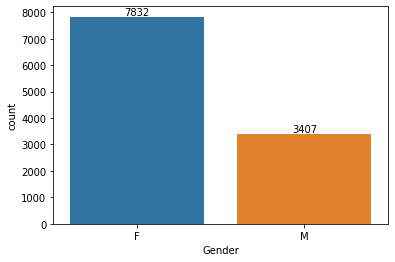

In [15]:
ax = sns.countplot(x ='Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see that most of the buyers are Females and even the purchasing power of females are greater than Mens.

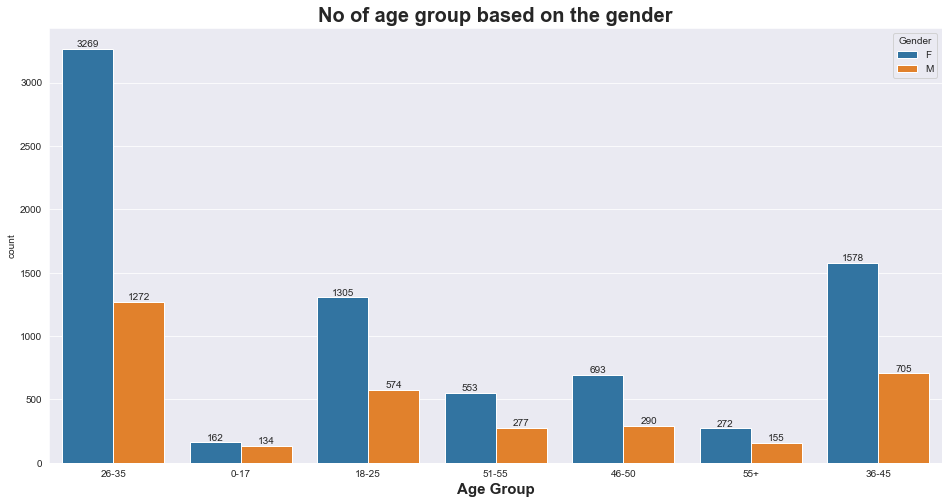

In [16]:
# no of age group based on the gender

plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
ax = sns.countplot(x='Age Group', data=df, hue='Gender')
plt.title('No of age group based on the gender', fontsize=20, fontweight='bold')
plt.xlabel('Age Group', size=15, fontweight='bold')


for bars in ax.containers:
    ax.bar_label(bars)

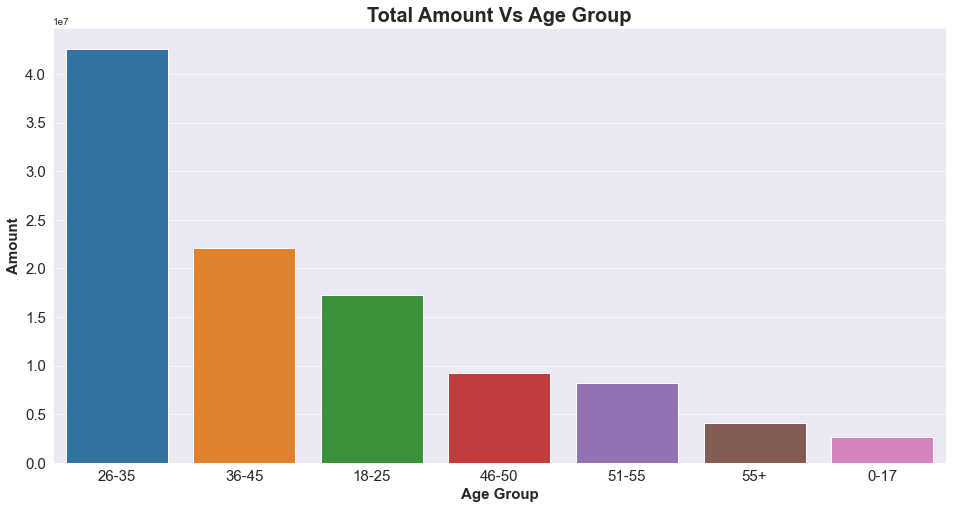

In [17]:
# total amount vs age group

plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by=['Amount'], ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age)
plt.title('Total Amount Vs Age Group', fontsize=20, fontweight='bold')
plt.xlabel('Age Group', size=15, fontweight='bold')
plt.ylabel('Amount', size=15, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

From the above graphs we can see that most of the buyers are of age group between 26-35 yrs Females.

**State**

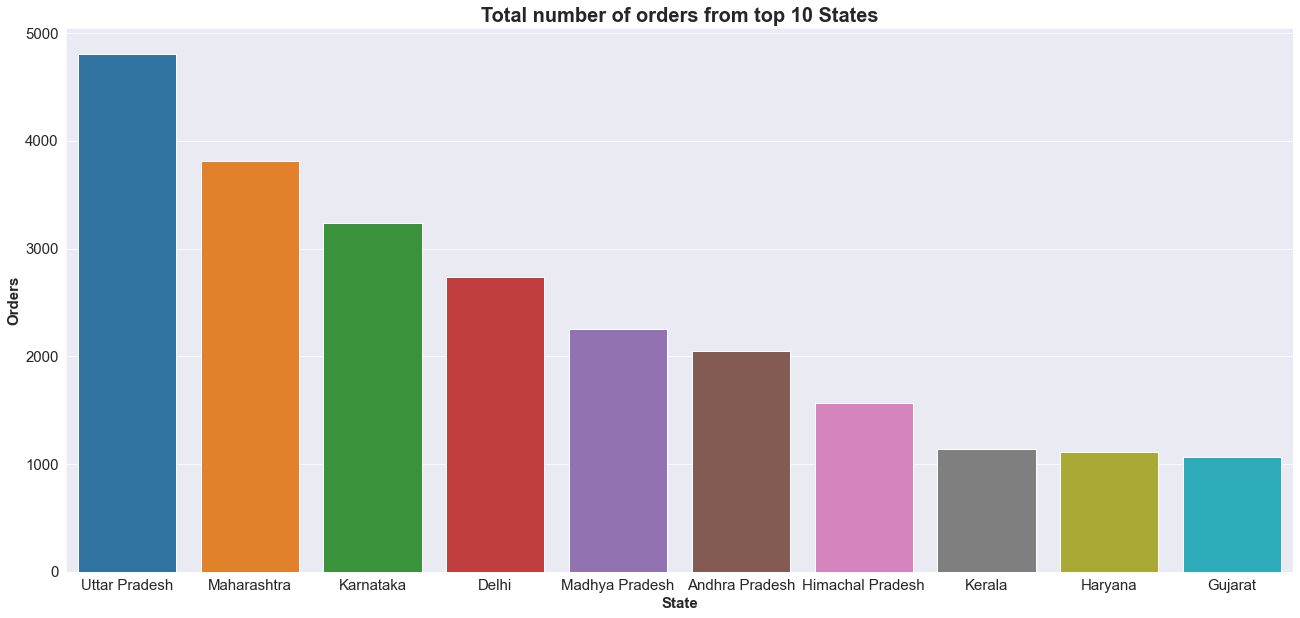

In [18]:
# total number of orders from top 10 states

plt.figure(figsize=(22,10))
sns.set_style(style='darkgrid')
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by=['Orders'], ascending=False).head(10)
sns.barplot(x='State', y='Orders', data=sales_state)
plt.title('Total number of orders from top 10 States', fontsize=20, fontweight='bold')
plt.xlabel('State', size=15, fontweight='bold')
plt.ylabel('Orders', size=15, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

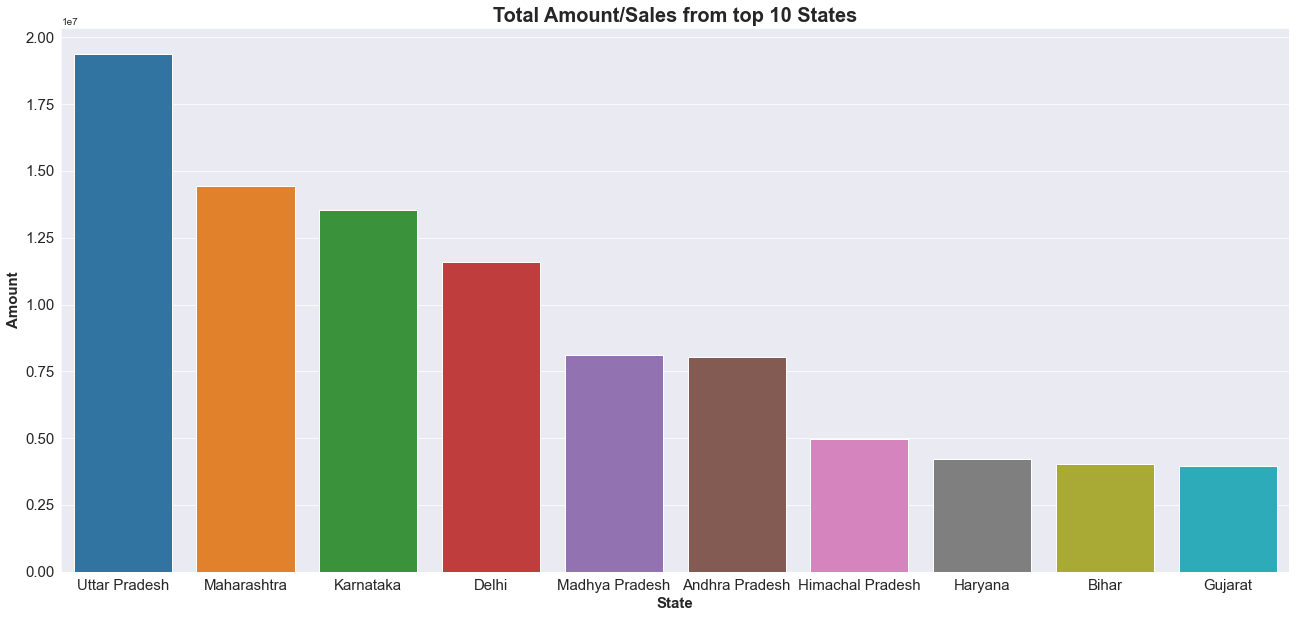

In [19]:
# total amount/sales from top 10 states

plt.figure(figsize=(22,10))
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(x='State', y='Amount', data=sales_state)
plt.title('Total Amount/Sales from top 10 States', fontsize=20, fontweight='bold')
plt.xlabel('State', size=15, fontweight='bold')
plt.ylabel('Amount', size=15, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

From above graphs we can see that most of the orders and total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

**Marital Status**

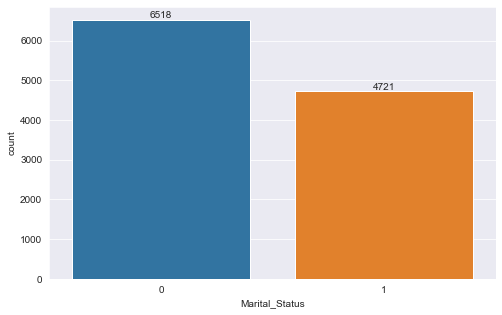

In [20]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Marital_Status', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

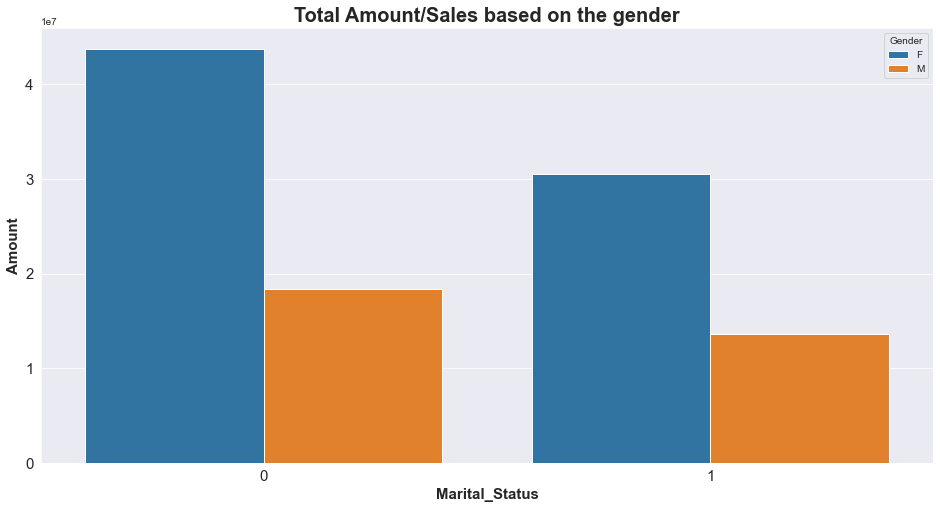

In [21]:
plt.figure(figsize=(16,8))
sales_marital_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=sales_marital_status)
plt.title('Total Amount/Sales based on the gender', fontsize=20, fontweight='bold')
plt.xlabel('Marital_Status', size=15, fontweight='bold')
plt.ylabel('Amount', size=15, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power.

**Occupation**

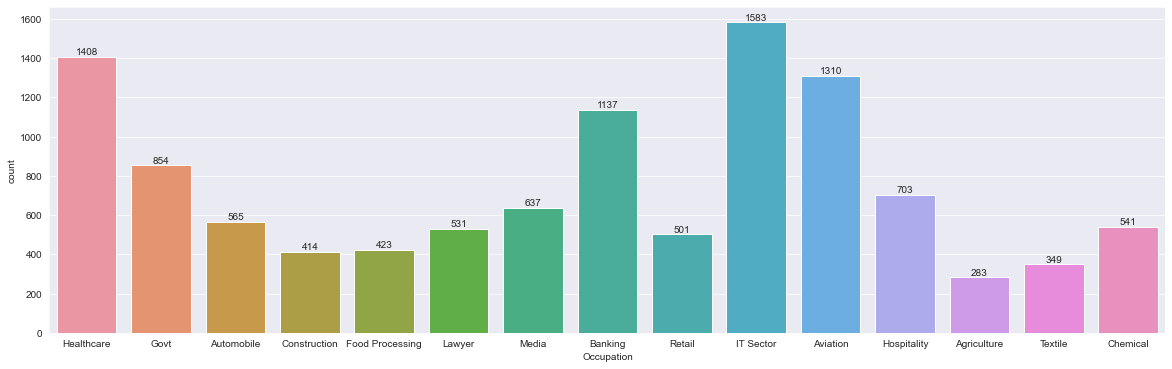

In [22]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='Occupation', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

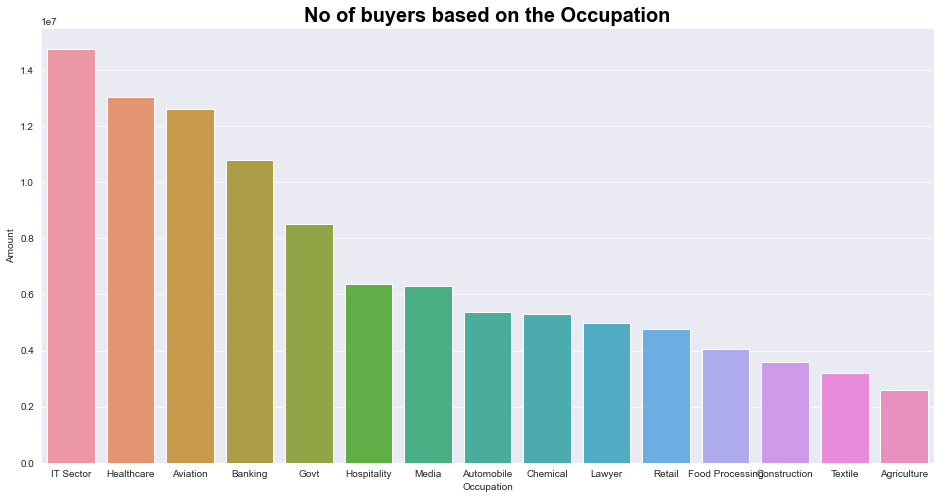

In [23]:
plt.figure(figsize=(16,8))
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Occupation', y='Amount', data=sales_occupation)
plt.title('No of buyers based on the Occupation', fontsize=20, fontweight='bold', color='black')
plt.show()

From the above graph we can see most of the buyers are working in IT, Healthcare and Avaiation.

**Product Category**

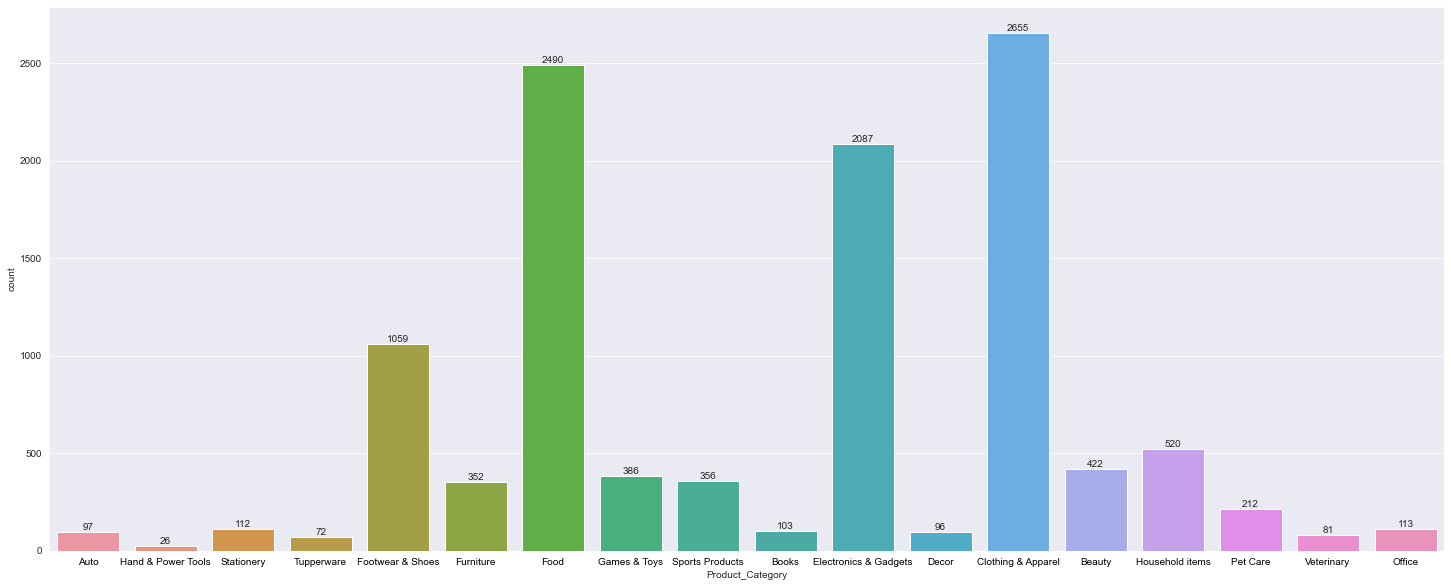

In [24]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='Product_Category', data=df)

plt.xticks(color='black')

for bars in ax.containers:
    ax.bar_label(bars)

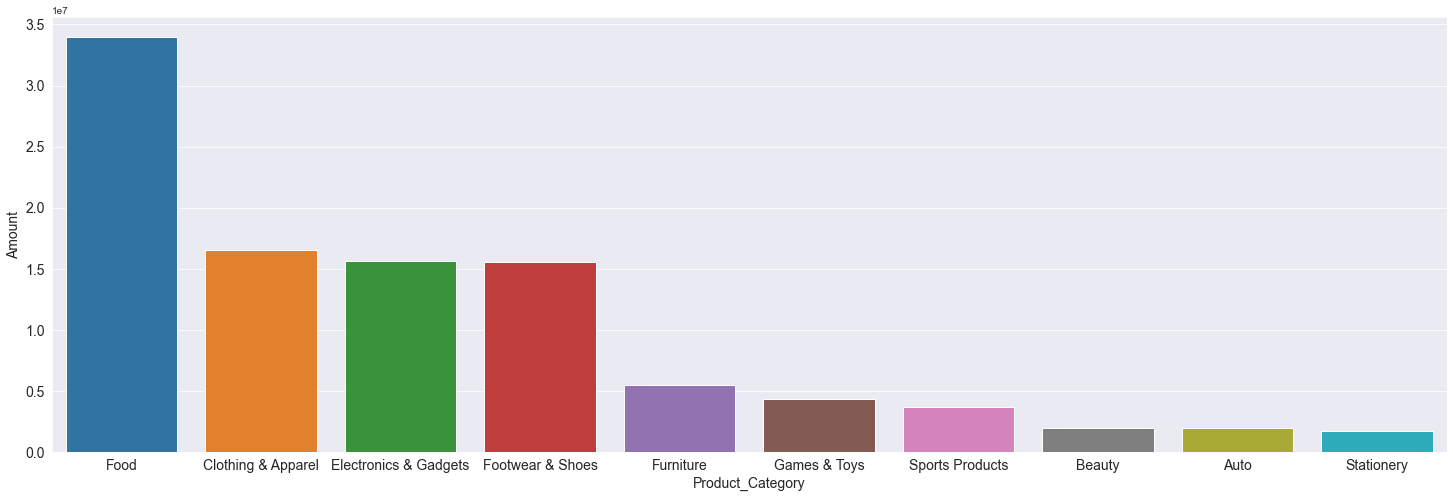

In [25]:
plt.figure(figsize=(25,8))
sales_product_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(x='Product_Category', y='Amount', data=sales_product_category)
plt.xlabel('Product_Category', size=14)
plt.ylabel('Amount', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

From the above graph we can see most of the sold products are from Food, Clothing & Apprael and Electronics & Gadgets Catgeory.

# Conclusions:

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.